## Classifying the SN Requiem SN sub-class based on host galaxy properties

In [7]:
import os
import numpy as np

from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.table import QTable, Table
from astropy import units as u
from astropy import constants

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.05)

import sncosmo
from scipy import integrate as scint

cgsfluxdensity = u.erg / u.Angstrom / u.cm**2 / u.s

In [8]:
import importlib
import snRequiem_host_based_classification as hostclass
from astropy.visualization import quantity_support

In [9]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fac22ef75d0>

In [87]:
importlib.reload(hostclass)

<module 'snRequiem_host_based_classification' from '/Users/rodney/Dropbox/src/snRequiem/Analysis/Classification/snRequiem_host_based_classification.py'>

In [88]:
phot = hostclass.ObservedPhotometry()
templ = hostclass.TemplateSED()
sed = hostclass.ObservedSED()

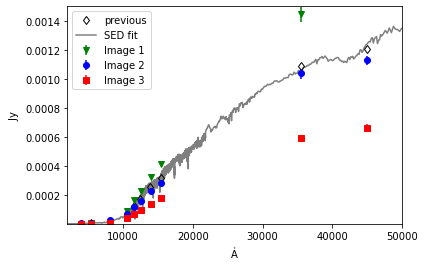

In [91]:
w1,f1,ferr1 = phot.observed_host_phot(1)
w2,f2,ferr2 = phot.observed_host_phot(2)
w3,f3,ferr3 = phot.observed_host_phot(3)
plt.errorbar(w1, f1, ferr1, marker='v', color='g', ls=' ', label='Image 1')
plt.errorbar(w2, f2, ferr2, marker='o', color='b', ls=' ', label='Image 2')
plt.errorbar(w3, f3, ferr3, marker='s', color='r', ls=' ', label='Image 3')
plt.plot(sed.wave, sed.fnu, marker='d', mfc='w', mec='k', ls=' ', label='previous')
plt.plot(templ.wave, templ.fnu, marker=' ', ls='-', color='k', alpha=0.5, label='SED fit')

ax = plt.gca()
ax.set_xlim(2000, 50000)
ax.set_ylim(1e-9,1.5e-3)
ax.legend()

In [92]:
# Get the absolute B and K band mags, applying a magnification correction of 8.3 (image 2)

B = templ.get_absolute_magnitude('B', zobs=1.95, mu=8.3)
K = templ.get_absolute_magnitude('K', zobs=1.95, mu=8.3)

print(B), print(K), print(B-K)

-30.01278862275315
-31.777424386220694
1.7646357634675454


(None, None, None)